In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [32]:
print("\nDataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)


Dataset shape: (1338, 7)

Column data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [33]:
# Convert all categorical columns to lowercase and strip spaces
df['sex'] = df['sex'].str.strip().str.lower()
df['smoker'] = df['smoker'].str.strip().str.lower()
df['region'] = df['region'].str.strip().str.lower()

# Check unique values in categorical columns
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'smoker':", df['smoker'].unique())
print("Unique values in 'region':", df['region'].unique())


Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']


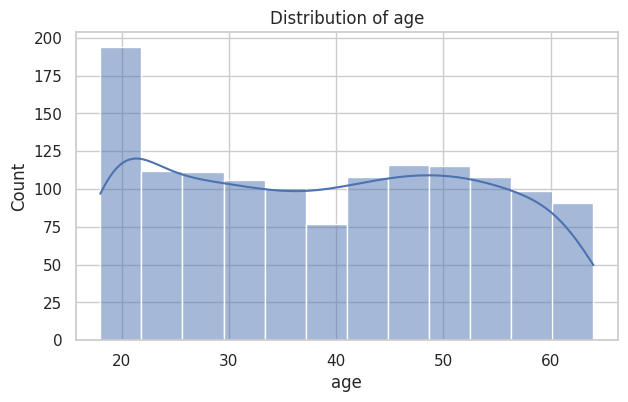

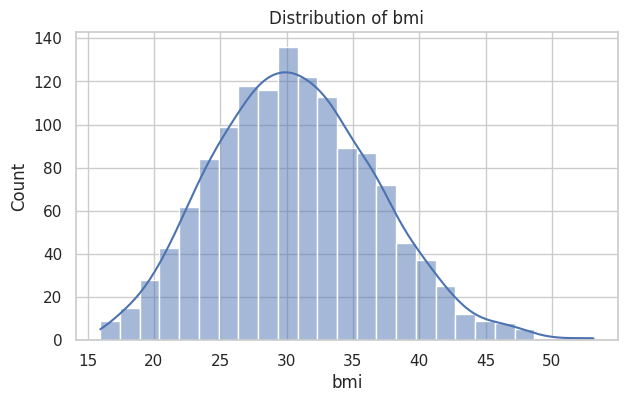

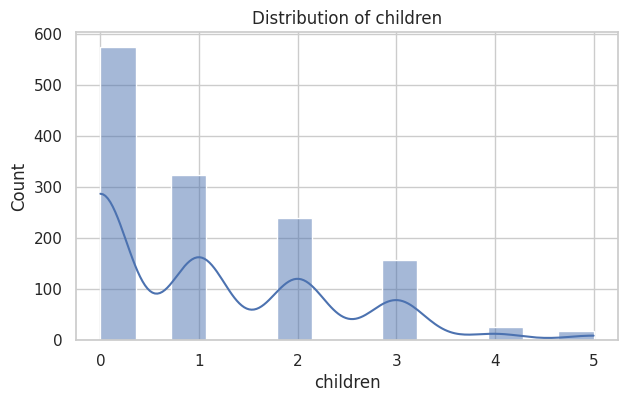

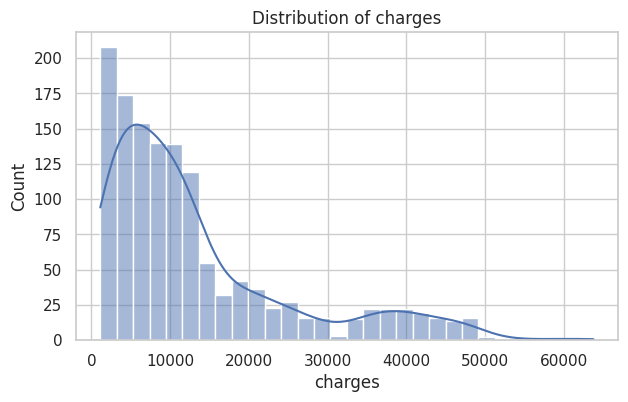

In [34]:
# Set the style
sns.set(style="whitegrid")

# Plot distributions for numeric features
numeric_cols = ['age', 'bmi', 'children', 'charges']
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


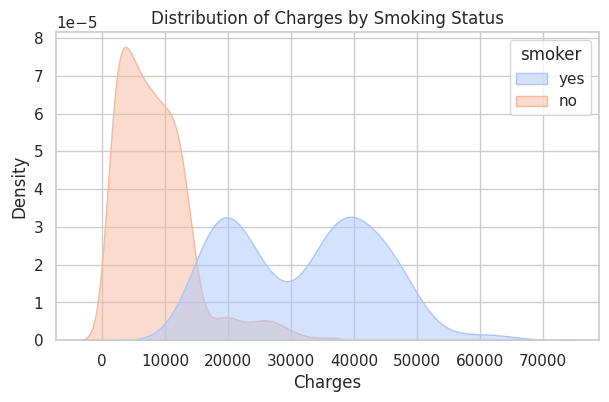

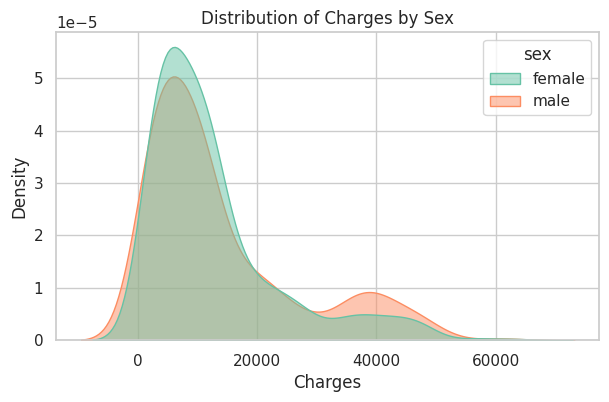

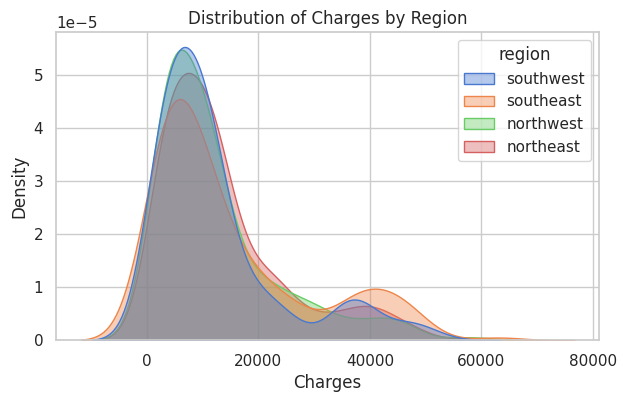

In [35]:
# Smoker vs Charges - KDE Plot
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x='charges', hue='smoker', fill=True, common_norm=False, alpha=0.5, palette='coolwarm')
plt.title("Distribution of Charges by Smoking Status")
plt.xlabel("Charges")
plt.show()

# Sex vs Charges - KDE Plot
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x='charges', hue='sex', fill=True, common_norm=False, alpha=0.5, palette='Set2')
plt.title("Distribution of Charges by Sex")
plt.xlabel("Charges")
plt.show()

# Region vs Charges - KDE Plot
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x='charges', hue='region', fill=True, common_norm=False, alpha=0.4, palette='muted')
plt.title("Distribution of Charges by Region")
plt.xlabel("Charges")
plt.show()


In [36]:
df_encoded = pd.get_dummies(df)
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:

# 1. Decision Tree Regressordt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# 3. k-NN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_preds)
knn_r2 = r2_score(y_test, knn_preds)

# Print Results
print("Model Performance (Before Feature Selection):")
print(f"Decision Tree MSE: {dt_mse:.2f}, R2: {dt_r2:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")
print(f"k-NN MSE: {knn_mse:.2f}, R2: {knn_r2:.2f}")

Model Performance (Before Feature Selection):
Decision Tree MSE: 37981594.47, R2: 0.76
Random Forest MSE: 21051837.12, R2: 0.86
k-NN MSE: 108705882.86, R2: 0.30


In [38]:

# Train a Random Forest on the full data
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Important Features:")
print(feat_imp_df.head())

# Select top 3 features
top_3_features = feat_imp_df.head(3)['Feature'].tolist()

Top Important Features:
      Feature  Importance
5   smoker_no    0.451506
1         bmi    0.213154
6  smoker_yes    0.157113
0         age    0.133897
2    children    0.019255


In [39]:
# Filter dataset to top 3 features
X_selected = X[top_3_features]

# Split again using selected features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train and evaluate models again
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "k-NN": KNeighborsRegressor()
}

# Store results
results_after = {}
for name, model in models.items():
    model.fit(X_train_sel, y_train_sel)
    y_pred = model.predict(X_test_sel)
    mse = mean_squared_error(y_test_sel, y_pred)
    r2 = r2_score(y_test_sel, y_pred)
    results_after[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} Performance (After Feature Selection): MSE: {mse:.2f}, R2: {r2:.2f}")

Decision Tree Performance (After Feature Selection): MSE: 50379417.40, R2: 0.68
Random Forest Performance (After Feature Selection): MSE: 43332364.12, R2: 0.72
k-NN Performance (After Feature Selection): MSE: 46827068.23, R2: 0.70
